In [1]:
from evaluation_functions import eval_ensembliste, eval_tfidf
import matplotlib.pyplot as plt

dataset = 'lisa'
results = dict()

In [2]:
## Data fully preprocessed
results[dataset] = eval_ensembliste(dataset, stop_words=True, stemm=True, bag_words=True)

In [3]:
def plot_precision_recall(evaluation_list, labels):
    """
    Plots multiple recall-precision curves on same plot (for comparison)
    :param evaluation_list: list of tuples [(x1, y1), (x2, y2), ...]
    :param labels: curves title
    :return: None
    """
    for evaluation, label in zip(evaluation_list, labels):
        plt.plot([e[0] for e in evaluation], [e[1] for e in evaluation], label=label)
    plt.grid()
    plt.legend(loc='upper right')

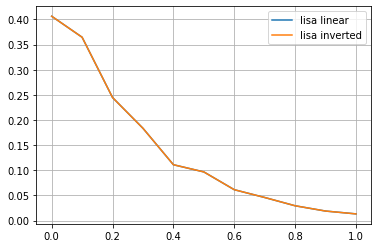

In [4]:
res_list = [results[dataset]["evaluation_linear"],
            results[dataset]["evaluation_inverted"]]

labels = [f"{dataset} linear",
          f"{dataset} inverted"]


plot_precision_recall(res_list, labels)
plt.show()

